<a href="https://colab.research.google.com/github/anko191/Python_Kaggle/blob/master/Optuna/lightgbm_digit_recognizer_optunaed.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv
/kaggle/input/digit-recognizer/sample_submission.csv


(33600, 785)
(33600, 784)
0 - 255


(8400, 784)

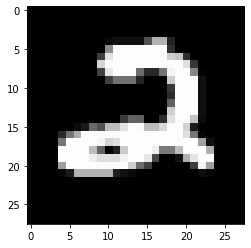

In [ ]:
train = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')
test = pd.read_csv('/kaggle/input/digit-recognizer/test.csv')
sub = pd.read_csv('/kaggle/input/digit-recognizer/sample_submission.csv')
train.head()
test.head()
sub.head()

from sklearn.model_selection import train_test_split
T_train, T_valid = train_test_split(train, test_size = 0.2, shuffle=True)
print(T_train.shape)
y_train, X_train = T_train.iloc[:,0], T_train.iloc[:,1:]
print(X_train.shape)
y_valid, X_valid = T_valid.iloc[:,0], T_valid.iloc[:,1:]
X_test = test

import matplotlib.pyplot as plt
# print(type(X_train))
X_train = X_train.values
y_train = y_train.values
X_valid = X_valid.values
y_valid = y_valid.values
X_test = X_test.values
# print(type(X_v))


X_v_r = X_train.reshape(X_train.shape[0], 28, 28)
X_tev_r = X_test.reshape(X_test.shape[0], 28, 28)
plt.imshow(X_v_r[0], cmap=plt.cm.gray)
plt.imshow(X_tev_r[0], cmap=plt.cm.gray)
# X_train_v = X_train.reshape(X_train[0],28,28)
# X_train_v.shape
# # plt.imshow(X_train[0], cmap = plt.cm.gray)
print(X_train.min(),'-',X_train.max())
X_train,X_valid = X_train/255, X_valid/255
X_train = X_train.reshape(X_train.shape[0], 784)
X_train.shape
X_valid.shape

## Optunaを通してlightgbmをimportする(!?)

In [ ]:
from optuna.integration import lightgbm as lgb

### これで普通に学習するだけで自動でチューニングしてくれる

In [ ]:
import time
ts = time.time()

train_data = lgb.Dataset(X_train, label = y_train)
valid_data = lgb.Dataset(X_valid, label = y_valid, reference=train_data)

params = {
    'task':'train',
    'boosting_type':'gbdt',
    'metric':'multi_logloss',
    'objective':'multiclass',
    'num_class':10,
    'verbose':0,
}

gbm = lgb.train(
    params,
    train_data,
    valid_sets = valid_data,
    early_stopping_rounds = 100,
    verbose_eval=100,
)

time.time() - ts

import pprint<Br>
pprint.pprint(gbm.params)<br>
pprint.pprint(gbm.best_iteration)<br>
pprint.pprint(gbm.best_score)<br>


### - - - - 

{'bagging_fraction': 1.0,<br>
 'bagging_freq': 0,<br>
 'boosting_type': 'gbdt',<br>
 'feature_fraction': 0.4,<br>
 'lambda_l1': 0.027971223378666015,<br>
 'lambda_l2': 5.057767953910145e-06,<br>
 'metric': 'multi_logloss',<br>
 'min_child_samples': 100,<br>
 'num_class': 10,<br>
 'num_leaves': 27,<br>
 'objective': 'multiclass',<br>
 'task': 'train',<br>
 'verbose': 0}<br>
395<br>
defaultdict(<class 'collections.OrderedDict'>,<br>
            {'valid_0': OrderedDict([('multi_logloss', 0.0820218911854557)])})<br>

In [ ]:
params = {'bagging_fraction': 1.0,
 'bagging_freq': 0,
 'boosting_type': 'gbdt',
 'feature_fraction': 0.4,
 'lambda_l1': 0.027971223378666015,
 'lambda_l2': 5.057767953910145e-06,
 'metric': 'multi_logloss',
 'min_child_samples': 100,
 'num_class': 10,
 'num_leaves': 27,
 'objective': 'multiclass',
 'task': 'train',
 'verbose': 0
}

In [ ]:
preds = gbm.predict(X_test)
y_pred = []
for x in preds:
    y_pred.append(np.argmax(x))
#submission
print(sub.columns)
sub.head(5)
print(len(y_pred))
# ID = np.arange(1,len(y_pred)+1)
# print(ID.shape)
# columns = ['ImageId','Label']
# submission = pd.DataFrame(data = [ID,y_pred], columns = columns,dtype=np.int)
# submission.head()
sub['Label'] = list(map(int,y_pred))
sub.to_csv('submission.csv', index = False)

Index(['ImageId', 'Label'], dtype='object')
28000
